# The Matplotlib Object Hierarchy

If you’ve worked through any introductory matplotlib tutorial, you’ve probably called something like plt.plot([1, 2, 3]). This one-liner hides the fact that a plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

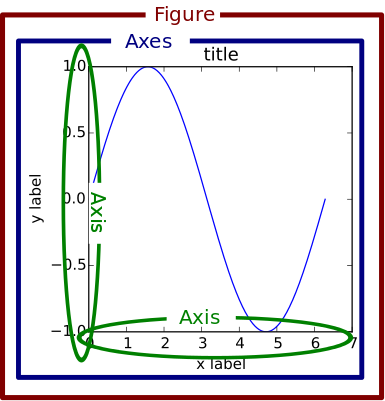

1. A Figure object is the outermost container for a matplotlib graphic <br>
2. A Figure can contain multiple Axes objects. <br>
3. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or  graph(rather than the plural of “axis,” as we might expect).<br>
4. Axis are the X and Y axis of the cartesian cordinate system.<br>
5. Each axis will have a label x lable for x axis and y label for y axis.

matplotlib.axes._subplots.AxesSubplot

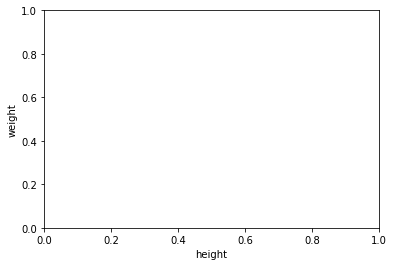

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("height")
ax.set_ylabel("weight")
type(fig)
type(ax)

In [15]:
ax.yaxis
print(ax.yaxis.get_major_ticks())
print(ax.xaxis.get_major_ticks())

[<matplotlib.axis.YTick object at 0x11fb034d0>, <matplotlib.axis.YTick object at 0x11fa13ed0>, <matplotlib.axis.YTick object at 0x11fb18a10>, <matplotlib.axis.YTick object at 0x11fb34510>, <matplotlib.axis.YTick object at 0x11fb34ed0>, <matplotlib.axis.YTick object at 0x11fb34790>]
[<matplotlib.axis.XTick object at 0x11faed950>, <matplotlib.axis.XTick object at 0x11fafc650>, <matplotlib.axis.XTick object at 0x11fb18f90>, <matplotlib.axis.XTick object at 0x11faf5590>, <matplotlib.axis.XTick object at 0x11fb2f590>, <matplotlib.axis.XTick object at 0x11fb2fa10>]


# Stateful vs stateless approaches

[]

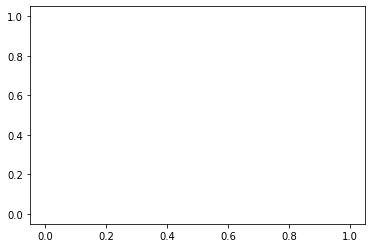

In [13]:
import matplotlib.pyplot as plt
plt.plot()



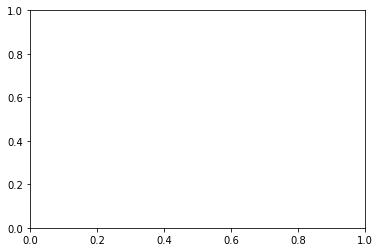

In [14]:
fig, ax = plt.subplots()

Almost all functions from pyplot, such as plt.plot(), are implicitly either referring to an existing current Figure and current Axes, or creating them a new if none exist. 

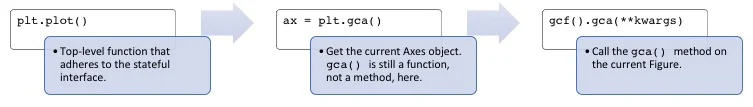

**Example of how the pyplot plot() function works internally**

In [ ]:
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)
    
def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)

**Calling plt.plot() is just a convenient way to get the current Axes of the current Figure and then call its plot() method. This is what is meant by the assertion that the stateful interface always “implicitly tracks” the plot that it wants to reference**

**pyplot is home to a batch of functions that are really just wrappers around matplotlib’s object-oriented interface. For example, with plt.title(), there are corresponding setter and getter methods within the OO approach, ax.set_title() and ax.get_title().
Calling plt.title() gets translated into this one line: gca().set_title(s, *args, **kwargs). Here’s what that is doing:**<br>

**1.gca() grabs the current axis and returns it.<br>
2.set_title() is a setter method that sets the title for that Axes object. The “convenience” here is that we didn’t need to specify any Axes object explicitly with plt.title().**

# Anatomy of matplotlib figure

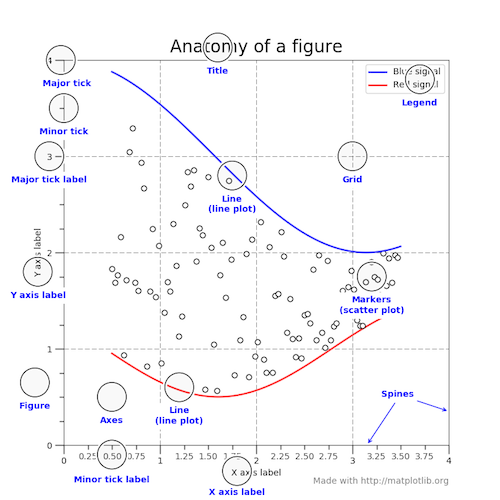

**The figure contains the overall window where plotting happens, contained within the figure are where actual graphs are plotted. Every Axes has an x-axis and y-axis for plotting. And contained within the axes are titles, ticks, labels associated with each axis. An essential figure of matplotlib is that we can more than axes in a figure which helps in building multiple plots**

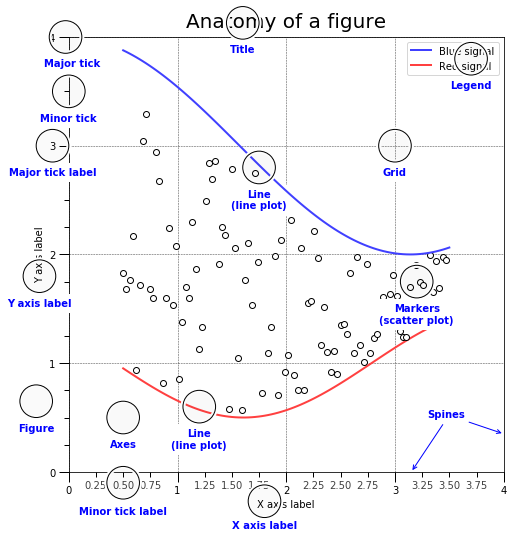

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

plt.show()